<a href="https://colab.research.google.com/github/soorajabraham1/PromiseQ/blob/main/PromiseQ_customYOLO640.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Jun 30 08:37:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   40C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Download MT-YOLOv6 repository and install requirements
!git clone https://github.com/meituan/YOLOv6
%cd YOLOv6
!pip install -r requirements.txt -q

Cloning into 'YOLOv6'...
remote: Enumerating objects: 3838, done.
remote: Counting objects: 100% (1718/1718), done.
remote: Compressing objects: 100% (330/330), done.
remote: Total 3838 (delta 1509), reused 1400 (delta 1388), pack-reused 2120
Receiving objects: 100% (3838/3838), 47.12 MiB | 33.09 MiB/s, done.
Resolving deltas: 100% (2341/2341), done.
/content/YOLOv6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 72.0 MB/s eta 0:00:00


## **Roboflow**
Using Roboflow the dataset is preprocessed and augmented.

Preprocessing:
*   Auto-Orient
*   Resize: Fit (black edges) in 640x640.

Eventhough YOLOv6 accepts images of different shape we make the shape uniform as best practice.

Augmentation:


*   Flip: Horizontal
*   Saturation: Between -25% and +25%
*   Brightness: Between -15% and +15%


Total images - 13302

Train set : Valid set : Test set :: 11638 : 1109 : 555

Initially the image was divided in the ratio 70:20:10 for train, valid and test.






In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="-------------")
project = rf.workspace("sooraj-abraham-5ocdl").project("yolo2500")
version = project.version(2)
dataset = version.download("mt-yolov6")





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to YOLO2500-2 in mt-yolov6:: 100%|██████████| 26615/26615 [00:04<00:00, 6387.10it/s] 


## Number of labels for each class

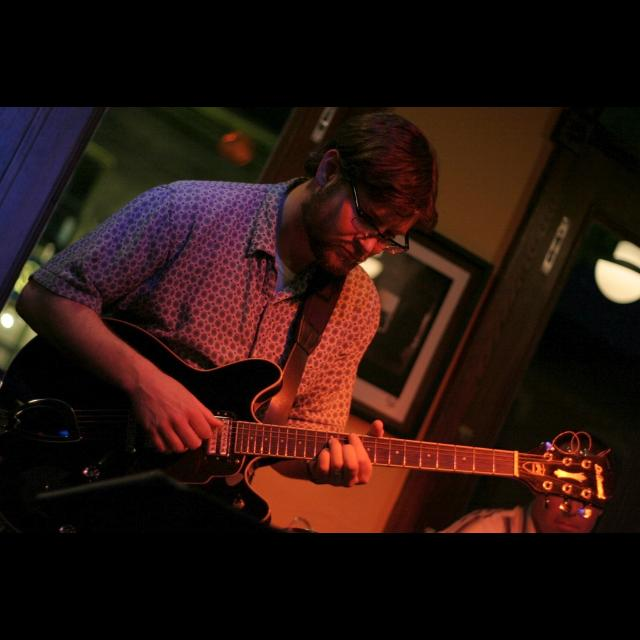

In [5]:
# display test inference result images
import glob
from IPython.display import Image, display


display(Image(filename="/content/YOLOv6/YOLO2500-2/images/test/168012f807c9c9c4_jpg.rf.914dd41a585c8d9f5ef9cc8a5b2a6c1d.jpg"))


In [ ]:
!python tools/train.py --batch 32 --conf configs/yolov6s_finetune.py --epochs 30 --img-size 640 --data YOLO2500-2/data.yaml --device 0

2024-06-28 16:37:28.778123: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-28 16:37:28.829549: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-28 16:37:28.829596: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-28 16:37:28.831140: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-28 16:37:28.839093: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
!python tools/eval.py --data YOLO2500-2/data.yaml --img-size 480 --weights runs/train/exp2/weights/best_ckpt.pt --device 0

Namespace(data='YOLO2500-2/data.yaml', weights='runs/train/exp2/weights/best_ckpt.pt', batch_size=32, img_size=480, conf_thres=0.03, iou_thres=0.65, task='val', device='0', half=False, save_dir='runs/val/', name='exp', shrink_size=0, infer_on_rect=True, reproduce_640_eval=False, eval_config_file='./configs/experiment/eval_640_repro.py', do_coco_metric=True, do_pr_metric=False, plot_curve=True, plot_confusion_matrix=False, verbose=False, config_file='', specific_shape=False, height=None, width=None)
Loading checkpoint from runs/train/exp2/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
Model Summary: Params: 18.50M, Gflops: 25.41
img record infomation path is:YOLO2500-2/images/.valid_cache.json
Val: Checking formats of labels with 8 process(es): 
1109 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 1109/1109 [00:00<00:00, 10554.35it/s]
Convert to COCO format
100% 1109/1109 [00:00<00:00, 93638.31it/s]
Convert to COCO format finishe

In [ ]:
# infer on all images in our /test directory
!python tools/infer.py --yaml YOLO2500-2/data.yaml --weights runs/train/exp2/weights/best_ckpt.pt --source YOLO2500-2/images/test --device 0

Namespace(weights='runs/train/exp2/weights/best_ckpt.pt', source='YOLO2500-2/images/test', webcam=False, webcam_addr='0', yaml='YOLO2500-2/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp2/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 555/555 [00:14<00:00, 38.10it/s]
Results saved to runs/inference/exp


In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

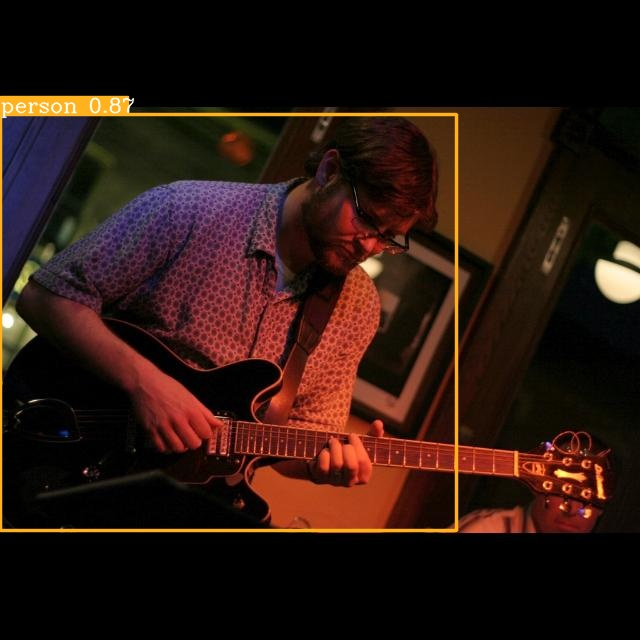

In [ ]:

display(Image(filename="/content/YOLOv6/runs/inference/exp/test/168012f807c9c9c4_jpg.rf.914dd41a585c8d9f5ef9cc8a5b2a6c1d.jpg"))
